In [113]:
import pandas as pd
df = pd.read_csv(r'D:\MLProjects\Titanic 1\Titanic-Dataset.csv')
df.head()


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [114]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
df.describe()


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [116]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling Numerical Values (Age)


In [117]:
from sklearn.impute import SimpleImputer

# Impute 'Age' with median
imputer = SimpleImputer(strategy='median')  # Strategy: 'median', 'mean', etc.
df['Age'] = imputer.fit_transform(df[['Age']])

In [118]:
df.isnull().sum() # The new Result for Age

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling Categorical Columns 

In [119]:
# Fill missing 'Embarked' with mode (most frequent value)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [120]:
df.isnull().sum() # The new Result for Emabrked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

 High Missingness

In [121]:
# # Option 1: Replace NaN with 'Unknown'
# df['Cabin'] = df['Cabin'].fillna('Unknown')

In [122]:
# Option 2: Create a binary feature "HasCabin"

df['HasCabin'] = df['Cabin'].notna().astype(int)
df = df.drop('Cabin', axis=1)  # Drop original column

In [123]:
df.isnull().sum() # The new Result for Emabrked

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
HasCabin       0
dtype: int64

In [124]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  HasCabin  
0      0         A/5 21171   7.2500        S         0  
1      0          PC 17599  71.2833        C         1  
2      0  STON/O2. 3101282   7.9250        S         0  
3      0            113803  53.1000        S         1  
4      0            373450   8.0500        S         0

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  HasCabin     891 non-null    int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


Categorical Encoding and Handling 


In [126]:
# List categorical columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)


Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')


Label Encoding

In [127]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [128]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Embarked  HasCabin  
0         A/5 21171   7.2500        S         0  
1          PC 17599  71.2833        C         1  
2  STON/O2. 3101282   7.9250        S         0  
3            113803  53.1000        S         1  
4            373450   8.0500        S         0

In [129]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop_first avoids multicollinearity
# embarked_encoded = encoder.fit_transform(df[['Embarked']])
# df = pd.concat([df, pd.DataFrame(embarked_encoded, columns=encoder.get_feature_names_out(['Embarked']))], axis=1)

One-Hot Encoding 

In [130]:
# Using pandas (simplest)
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=False)

In [131]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  HasCabin  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500         0       False       False        True  
1          PC 17599  71.2833         1        True       False       False  
2  STON/O2. 3101282   7.9250         0       False       False        True  
3            113803  53.1000         1       False       False        True  
4            373450   8.0500         0       False       False        True

Ordinal Encoding 

In [132]:
encoder = OrdinalEncoder(categories=[[1, 2, 3]])  # Define order: 1 < 2 < 3
df[['Pclass']] = encoder.fit_transform(df[['Pclass']]) + 1  # Add 1 to start from 1


In [133]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0     3.0   
1            2         1     1.0   
2            3         1     3.0   
3            4         1     1.0   
4            5         0     3.0   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  HasCabin  Embarked_C  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500         0       False       False        True  
1          PC 17599  71.2833         1        True       False       False  
2  STON/O2. 3101282   7.9250         0       False       False        True  
3            113803  53.1000         1       False       False        True  
4            373450   8.0500         0       False       False        True

In [134]:
df = df.drop(['Name', 'Ticket', 'PassengerId'], axis=1)

In [135]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  HasCabin  Embarked_C  \
0         0     3.0    1  22.0      1      0   7.2500         0       False   
1         1     1.0    0  38.0      1      0  71.2833         1        True   
2         1     3.0    0  26.0      0      0   7.9250         0       False   
3         1     1.0    0  35.0      1      0  53.1000         1       False   
4         0     3.0    1  35.0      0      0   8.0500         0       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True

Visualize Outliers


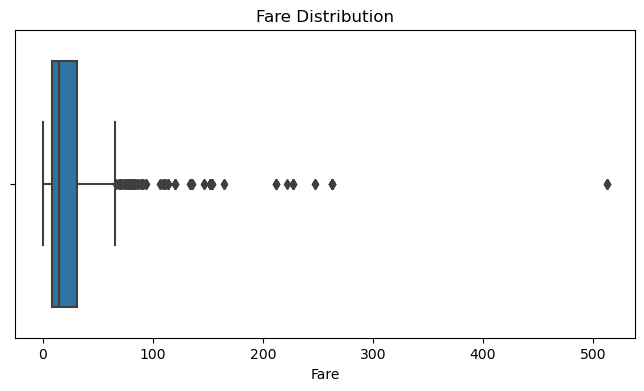

d:\Anaconda\envs\Trial1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for 'Fare'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution')
plt.show()

# Histogram for 'Fare'
plt.figure(figsize=(8, 4))
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


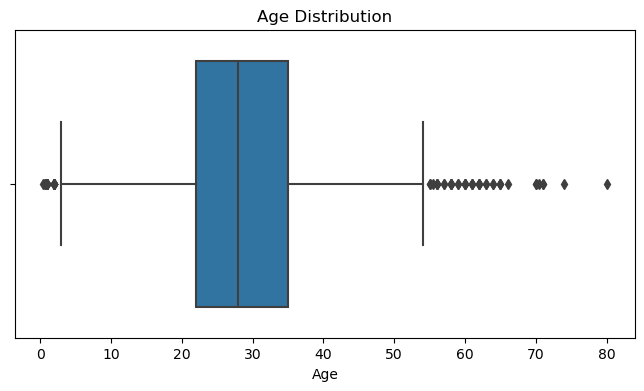

d:\Anaconda\envs\Trial1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


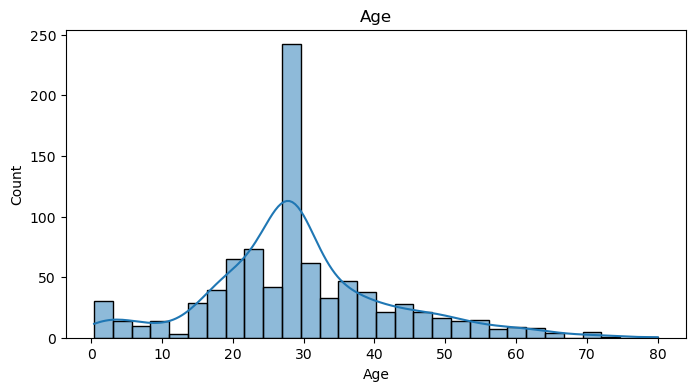

In [ ]:
# Boxplot for 'Age'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'])
plt.title('Age Distribution')
plt.show()

# Histogram for 'Age'
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True)
plt.title('Age')
plt.show()


In [145]:
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"Lower bound for {column}: {lower_bound}")
    print(f"Upper bound for {column}: {upper_bound}")
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Detect outliers in 'Fare'
fare_outliers = detect_outliers_iqr(df, 'Fare')
print(f"Number of outliers in Fare: {len(fare_outliers)}")


Lower bound for Fare: -26.724
Upper bound for Fare: 65.6344
Number of outliers in Fare: 116


In [146]:
from scipy import stats

def detect_outliers_zscore(data, column, threshold=3):
    z_scores = stats.zscore(data[column].dropna())  # Drop NaN for calculation
    outliers = data[(abs(z_scores) > threshold)]
    return outliers

# Detect outliers in 'Age'
age_outliers = detect_outliers_zscore(df, 'Age')
print(f"Number of outliers in Age: {len(age_outliers)}")

Number of outliers in Age: 7


In [148]:
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  HasCabin  Embarked_C  \
0         0     3.0    1  22.0      1      0   7.2500         0       False   
1         1     1.0    0  38.0      1      0  71.2833         1        True   
2         1     3.0    0  26.0      0      0   7.9250         0       False   
3         1     1.0    0  35.0      1      0  53.1000         1       False   
4         0     3.0    1  35.0      0      0   8.0500         0       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True

Train Test Split 

In [150]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]

# X = df.drop('Survived', axis=1)  # Features

y = df['Survived']

# Split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)